### Imports

In [1]:
import math
import datetime

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Constants

In [2]:
PATH_FILE_ORDER = './file/olist_orders_dataset.csv'
PATH_FILE_ORDER_ITEM = './file/olist_order_items_dataset.csv'
PATH_FILE_ORDER_REVIEW = './file/olist_order_reviews_dataset.csv'
PATH_FILE_ORDER_PAYMENT = './file/olist_order_payments_dataset.csv'

PATH_FILE_PROD = './file/olist_products_dataset.csv'
PATH_FILE_SELLER = './file/olist_sellers_dataset.csv'
PATH_FILE_CUSTOMER = './file/olist_customers_dataset.csv'
PATH_FILE_GEOLOCATION = './file/olist_geolocation_dataset.csv'
PATH_FILE_PROD_CATEGORY_TRANSLATE = './file/product_category_name_translation.csv'

# Reviews

### Constants

In [3]:

# Original columns
COL_REV_ID = 'review_id'
COL_REV_MSG = 'review_comment_message'
COL_REV_ORDER = 'order_id'
COL_REV_SCORE = 'review_score'
COL_REV_TITLE = 'review_comment_title'
COL_REV_ANSWER = 'review_answer_timestamp'
COL_REV_CREATION = 'review_creation_date'

# Custom Columns
COL_REV_CUS_MSG_LEN = 'Message Length'

# Rename
sortReview = [COL_REV_SCORE, COL_REV_CUS_MSG_LEN, COL_REV_TITLE, COL_REV_MSG]
columnsReview = [COL_REV_ORDER, COL_REV_SCORE, COL_REV_CUS_MSG_LEN, COL_REV_TITLE, COL_REV_MSG]

### Build Dataframe

In [4]:
# Import file
reviewsDF = pd.read_csv(PATH_FILE_ORDER_REVIEW)
reviewsDFClean = reviewsDF[reviewsDF[COL_REV_MSG].notnull()]

# Handle NaN values
reviewsDF.loc[reviewsDF[COL_REV_MSG].isnull(), COL_REV_MSG] = ''
reviewsDF.loc[reviewsDF[COL_REV_TITLE].isnull(), COL_REV_TITLE] = ''

reviewsDFClean.loc[reviewsDFClean[COL_REV_TITLE].isnull(), COL_REV_TITLE] = ''

# Compute review lengths
reviewsDF[COL_REV_CUS_MSG_LEN] = reviewsDF[COL_REV_MSG].apply(lambda msg: len(msg))
reviewsDFClean[COL_REV_CUS_MSG_LEN] = reviewsDFClean[COL_REV_MSG].apply(lambda msg: len(msg))

# Format
reviewsDF = reviewsDF.sort_values(by=sortReview, ascending=False)[columnsReview]
reviewsDFClean = reviewsDFClean.sort_values(by=sortReview, ascending=False)[columnsReview]
# reviewsDF.tail()

/home/hjcosta/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/tmp/ipykernel_20941/246512536.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewsDFClean[COL_REV_CUS_MSG_LEN] = reviewsDFClean[COL_REV_MSG].apply(lambda msg: len(msg))


### Statistics

In [ ]:
reviewsCount = reviewsDF.shape[0]
noMsgReviewsCount = reviewsDF.loc[reviewsDF[COL_REV_CUS_MSG_LEN] == 0].shape[0]
noMsgReviewsRatio = round(noMsgReviewsCount / reviewsCount * 100, 2)

print(f'Reviews: {reviewsCount}')
print(f'Empty message reviews: {noMsgReviewsCount} / {reviewsCount} ({noMsgReviewsRatio}%)')

scoreValues = sorted(reviewsDF[COL_REV_SCORE].unique())
for score in scoreValues:

    scoredDF = reviewsDF.loc[reviewsDF[COL_REV_SCORE] == score]

    scoredCount = scoredDF.shape[0]
    scoredRatio = round(scoredCount / reviewsCount * 100, 2)
    noMsgScoredCount = scoredDF.loc[reviewsDF[COL_REV_CUS_MSG_LEN] == 0].shape[0]
    noMsgScoredRation = round(noMsgScoredCount / scoredCount * 100, 2)

    print(f'{score} Score: {scoredCount} / {reviewsCount} ({scoredRatio}%)')
    print(f'\tNo message: {noMsgScoredCount} / {scoredCount} ({noMsgScoredRation}%)')

### Plots

/tmp/ipykernel_20941/2605248469.py:62: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


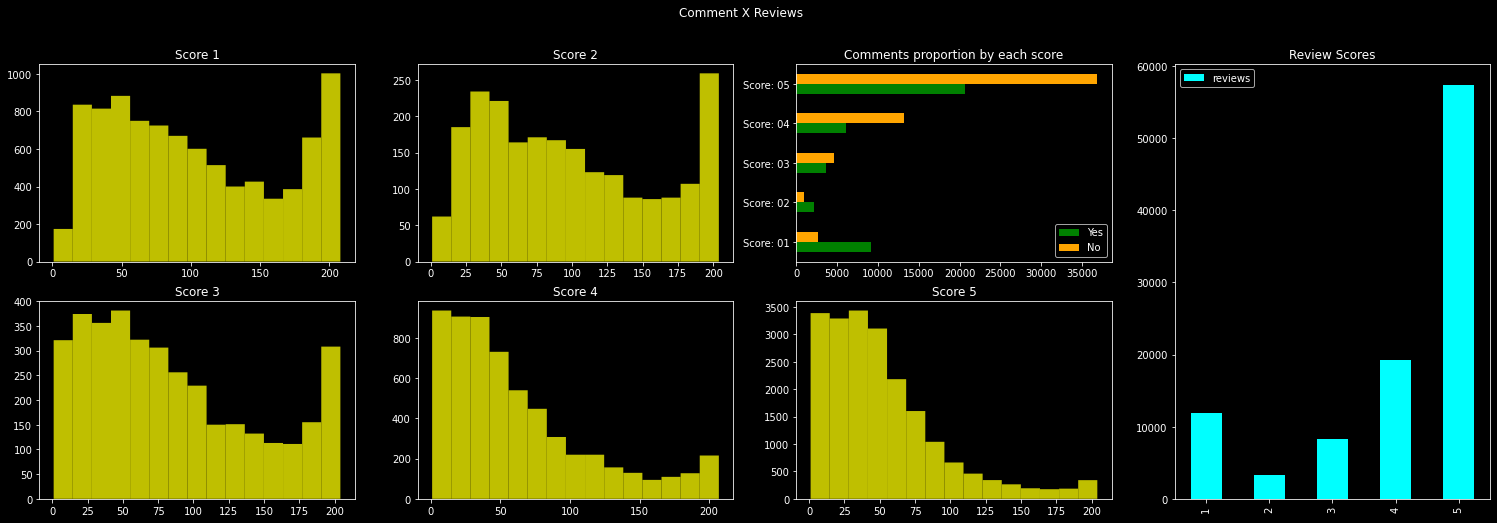

In [5]:

# Build grid
figure = plt.figure(figsize=(26, 8))

a11 = plt.subplot2grid((2, 4), (0, 0), fig=figure)
a12 = plt.subplot2grid((2, 4), (0, 1), fig=figure)
a13 = plt.subplot2grid((2, 4), (0, 2), fig=figure)

a14 = plt.subplot2grid((2, 4), (0, 3), fig=figure, rowspan=2)

a21 = plt.subplot2grid((2, 4), (1, 0), fig=figure)
a22 = plt.subplot2grid((2, 4), (1, 1), fig=figure)
a23 = plt.subplot2grid((2, 4), (1, 2), fig=figure)

# Bars graph: Total of review per each score.
bars = pd.DataFrame({
        'reviews': [
            reviewsDF[reviewsDF[COL_REV_SCORE] == 1].shape[0],
            reviewsDF[reviewsDF[COL_REV_SCORE] == 2].shape[0],
            reviewsDF[reviewsDF[COL_REV_SCORE] == 3].shape[0],
            reviewsDF[reviewsDF[COL_REV_SCORE] == 4].shape[0],
            reviewsDF[reviewsDF[COL_REV_SCORE] == 5].shape[0],
        ]
    },
    index=[1, 2, 3, 4, 5],
)

bars.plot.bar(ax=a14, title='Review Scores', color='cyan')

# Bars graph: Show proportion of reviews with or without comments per each score level.
yes = []
no = []
scores = []

for i in range(1, 6):
    _yes = reviewsDF[(reviewsDF[COL_REV_SCORE] == i) & (reviewsDF[COL_REV_CUS_MSG_LEN] > 0)].shape[0]
    _no = reviewsDF[(reviewsDF[COL_REV_SCORE] == i) & (reviewsDF[COL_REV_CUS_MSG_LEN] == 0)].shape[0]
    total = _yes + _no

    scores.append('Score: 0' + str(i))
    yes.append(_yes)
    no.append(_no)

barh = pd.DataFrame({ 'Yes': yes, 'No': no }, index=scores)
barh.plot.barh(
    ax=a13,
    title='Comments proportion by each score',
    color={ 'Yes': 'green', 'No': 'orange', 'AVG': 'c'},
)

# Histograms: Show length of commentaries per each review score level
figPositionMap = {
    1: a11, 2: a12,
    3: a21, 4: a22, 5: a23,
}

for i in range(1, 6):
    a = figPositionMap.get(i)
    a.hist(reviewsDFClean[reviewsDFClean[COL_REV_SCORE] == i][COL_REV_CUS_MSG_LEN].values, bins=15, facecolor='y', snap=False)
    a.set_title('Score ' + str(i))

figure.suptitle('Comment X Reviews')
figure.show()

# Orders

### Constants

In [36]:

# Original columns: Orders
COL_ORD_ID = 'order_id'
COL_ORD_STATUS = 'order_status'
COL_ORD_CUSTOMER = 'customer_id'

COL_ORD_DATE_BUY = 'order_purchase_timestamp'
COL_ORD_DATE_APPROV = 'order_approved_at'
COL_ORD_DATE_CARRIER = 'order_delivered_carrier_date'
COL_ORD_DATE_DELIVER = 'order_delivered_customer_date'
COL_ORD_DATE_DELIVER_EST = 'order_estimated_delivery_date'

# Original columns: Order Items
COL_ORD_ITEM_ID = 'order_item_id'
COL_ORD_ITEM_PROD = 'product_id'
COL_ORD_ITEM_PRICE = 'price'
COL_ORD_ITEM_ORDER = 'order_id'
COL_ORD_ITEM_SELLER = 'seller_id'
COL_ORD_ITEM_FREIGHT = 'freight_value'
COL_ORD_ITEM_DATE_SHIP_LIMIT = 'shipping_limit_date'

# Custom columns
COL_ORD_CUS_TIME_DELAY = 'Delivery Delay'
COL_ORD_CUS_TIME_DELIVER = 'Time to Deliver'
COL_ORD_CUS_PRICE = 'Order Price'
COL_ORD_CUS_FREIGHT = 'Order Freight'

# Status
STATUS_ORD_APPROV = 'approved'
STATUS_ORD_CANCEL = 'canceled'
STATUS_ORD_CREATED = 'created'
STATUS_ORD_DELIVERED = 'delivered'
STATUS_ORD_INVOICED = 'invoiced'
STATUS_ORD_PROCESSING = 'processing'
STATUS_ORD_SHIPPED = 'shipped'
STATUS_ORD_UNAVAILABLE = 'unavailable'

# Rename
endStatuses = [STATUS_ORD_CANCEL, STATUS_ORD_DELIVERED]
midStatuses = [STATUS_ORD_CREATED, STATUS_ORD_APPROV, STATUS_ORD_INVOICED, STATUS_ORD_PROCESSING, STATUS_ORD_SHIPPED]
allValidStatuses = endStatuses + midStatuses

sortOrder = [
    COL_ORD_STATUS,
    COL_REV_SCORE, COL_REV_CUS_MSG_LEN,
    COL_ORD_CUS_TIME_DELAY, COL_ORD_CUS_TIME_DELIVER,
    COL_ORD_CUS_FREIGHT, COL_ORD_CUS_PRICE,
]

columnsOrder = columnsReview + [
    COL_ORD_ID, COL_ORD_STATUS,
    # COL_ORD_DATE_BUY, COL_ORD_DATE_DELIVER_EST, COL_ORD_DATE_DELIVER,
    COL_ORD_CUS_TIME_DELAY, COL_ORD_CUS_TIME_DELIVER,
    COL_ORD_CUS_PRICE, COL_ORD_CUS_FREIGHT,
]

columnsOrder = sorted(set(columnsOrder), key=columnsOrder.index)

### Utils

In [10]:

def getDaysInterval(mainDate: datetime.date, relativeDate: datetime.date = None, isRelativeToToday = True) -> int:
    '''
        TODO: 2021-10-14 - ADD Description
    '''

    upperDate = datetime.datetime.today() if isRelativeToToday else relativeDate
    hasUpperDate = upperDate and str(upperDate) != 'NaT'
    return math.floor((upperDate - mainDate) / np.timedelta64(1,'D')) if hasUpperDate else 0

def getDaysDelay(maxDate: datetime.date, deliveryDate: np.datetime64 = None):
    '''
        TODO: 2021-10-14 - ADD Description
    '''

    upperDate = deliveryDate or datetime.datetime.today()
    isDelayed = upperDate > maxDate
    return getDaysInterval(maxDate, upperDate, False) if isDelayed else 0

def setDeliveryDays(df: pd.DataFrame) -> pd.Series:
    '''
        TODO: 2021-10-14 - ADD Description
    '''
    
    return np.vectorize(getDaysInterval)(
        df[COL_ORD_DATE_DELIVER_EST],
        df[COL_ORD_DATE_DELIVER],
        ~df[COL_ORD_STATUS].isin(endStatuses)
    )


def setDelayDays(df: pd.DataFrame) -> pd.Series:
    '''
        TODO: 2021-10-14 - ADD Description
    '''
    
    return np.vectorize(getDaysDelay)(
        df[COL_ORD_DATE_DELIVER_EST],
        df[COL_ORD_DATE_DELIVER],
    )

def getOrderPrice(source: pd.Series, orderID: str) -> float:
    '''
        TODO: 2021-10-15 - ADD Description
    '''
    
    try:
        return source.loc[orderID]
    except KeyError:
        return 0

### Build Dataframe

In [37]:

# Import files
dateColumns = [COL_ORD_DATE_BUY, COL_ORD_DATE_DELIVER, COL_ORD_DATE_DELIVER_EST]

ordersDF = pd.read_csv(PATH_FILE_ORDER, parse_dates=dateColumns)
orderItemDF = pd.read_csv(PATH_FILE_ORDER_ITEM)

# Clean data: Step 01 (remove inconsistent & unavailable data)
ordersDF = ordersDF[
  (ordersDF[COL_ORD_STATUS] != STATUS_ORD_UNAVAILABLE)
  & ~((ordersDF[COL_ORD_STATUS] == STATUS_ORD_DELIVERED) & (ordersDF[COL_ORD_DATE_DELIVER].isnull())) # Avoid failure on time interval calculations
]

# Add calculated interval fields 
ordersDF[COL_ORD_CUS_TIME_DELAY] = setDelayDays(ordersDF)
ordersDF[COL_ORD_CUS_TIME_DELIVER] = setDeliveryDays(ordersDF)

# Clean data: Step 02 (keep only orders unfinished or finished with consistent data)
ordersDF = ordersDF[
    (ordersDF[COL_ORD_CUS_TIME_DELAY] >= 0) | (ordersDF[COL_ORD_CUS_TIME_DELIVER] >= 0)
    | ~ordersDF[COL_ORD_STATUS].isin(endStatuses)
]

# Add order price & freight price
# productMeanPrice = orderItemDF[ [COL_ORD_ITEM_PROD, COL_ORD_ITEM_PRICE] ].groupby(COL_ORD_ITEM_PROD).mean().sort_values(by=COL_ORD_ITEM_PROD)
orderFreight = orderItemDF[ [COL_ORD_ITEM_ORDER, COL_ORD_ITEM_FREIGHT] ].groupby(COL_ORD_ITEM_ORDER).sum().sort_values(by=COL_ORD_ITEM_ORDER)
orderPrice = orderItemDF[ [COL_ORD_ITEM_ORDER, COL_ORD_ITEM_PRICE] ].groupby(COL_ORD_ITEM_ORDER).sum().sort_values(by=COL_ORD_ITEM_ORDER)

ordersDF[COL_ORD_CUS_FREIGHT] = ordersDF[COL_ORD_ID].apply(lambda id: getOrderPrice(orderFreight[COL_ORD_ITEM_FREIGHT], id))
ordersDF[COL_ORD_CUS_PRICE] = ordersDF[COL_ORD_ID].apply(lambda id: getOrderPrice(orderPrice[COL_ORD_ITEM_PRICE], id))

# Add review data
ordersDF = pd.merge(left=ordersDF, right=reviewsDF, on=COL_ORD_ID)

# Format
ordersDF = ordersDF.sort_values(by=sortOrder, ascending=True, na_position='first')[columnsOrder]

In [54]:
# averagesDF = ordersDF[ [COL_ORD_ID, COL_ORD_STATUS,  COL_REV_SCORE] ].groupby(COL_ORD_STATUS).mean()

# proportions = []
# averageScores = []

# for status in allValidStatuses:
#     proportions.append( (ordersDF[ ordersDF[COL_ORD_STATUS] == status ].shape[0] / ordersDF.shape[0]) * 5 )
#     averageScores.append( (ordersDF[ ordersDF[COL_ORD_STATUS] == status ].shape[0] / ordersDF.shape[0]) )

# # barh = pd.DataFrame({ 'Proportion [x5]': proportions, 'Average Score': averageScores }, index=allValidStatuses)
# # barh


# print(proportions)
# print(averageScores)

# # averagesDF.review_score['canceled']
# ordersDF.shape[0]
# ordersDF[ ordersDF[COL_ORD_STATUS] == 'canceled' ].shape[0]

deliveredOrders = ordersDF[ ordersDF[COL_ORD_STATUS] == STATUS_ORD_DELIVERED ]
deliveredOrders

,order_id,review_score,Message Length,review_comment_title,review_comment_message,order_status,Delivery Delay,Time to Deliver,Order Price,Order Freight
25881,2f01a66f78b2de411ae9a3ca2eb73c2e,1,0,,,delivered,0,-43,59.90,14.15
82419,675dac8b73cb0d20fa633e864deb7e1e,1,0,,,delivered,0,-41,299.80,24.00
45933,d3fa993cd95accac6c3d0b7e51dffcda,1,0,,,delivered,0,-36,39.90,15.38
73482,5103a33779a9aef136d6dbe242f779e0,1,0,Não chegou,,delivered,0,-36,99.00,26.77
55045,7810232f329f64a33e2238b22ea8231e,1,0,,,delivered,0,-35,72.00,43.70
...,...,...,...,...,...,...,...,...,...,...
79955,3f8f3b3ace5d3cf820f9d891b366f621,5,202,,Fiquei com receio de fazer essa comora pela In...,delivered,0,-2,134.17,21.02
90458,65d949ae1a2e6f0e1c65dd06b9fb5eb2,5,203,,"Recomendo a loja targaryen e seus produtos ,po...",delivered,0,-18,84.90,17.84
28775,7cba130d7fd9cbf1fa889eaaf7c89d29,5,203,,Os 4 rolos chegaram juntos e 12 dias antes do ...,delivered,0,-12,236.00,51.00
8093,ed95597d2fd96ad370b62bbfc4b6127b,5,204,,"Parabéns ,o produto tira rico da empresa targa...",delivered,0,-13,31.99,16.05


## Plots

/tmp/ipykernel_20941/250757139.py:94: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


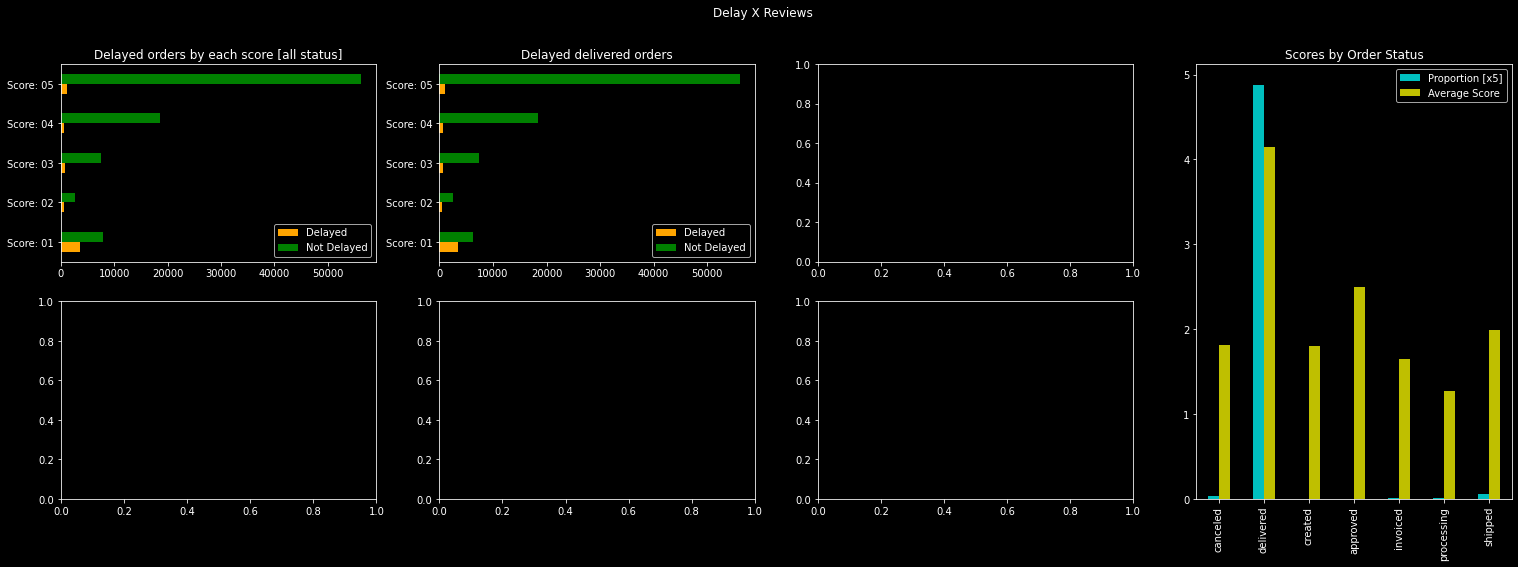

In [53]:

# Build grid
figure = plt.figure(figsize=(26, 8))

a11 = plt.subplot2grid((2, 4), (0, 0), fig=figure)
a12 = plt.subplot2grid((2, 4), (0, 1), fig=figure)
a13 = plt.subplot2grid((2, 4), (0, 2), fig=figure)

a14 = plt.subplot2grid((2, 4), (0, 3), fig=figure, rowspan=2)

a21 = plt.subplot2grid((2, 4), (1, 0), fig=figure)
a22 = plt.subplot2grid((2, 4), (1, 1), fig=figure)
a23 = plt.subplot2grid((2, 4), (1, 2), fig=figure)

# # bars = pd.DataFrame({
# #         'reviews': [
# #             reviewsDF[reviewsDF[COL_REV_SCORE] == 1].shape[0],
# #             reviewsDF[reviewsDF[COL_REV_SCORE] == 2].shape[0],>
# #             reviewsDF[reviewsDF[COL_REV_SCORE] == 4].shape[0],
# #             reviewsDF[reviewsDF[COL_REV_SCORE] == 5].shape[0],
# #         ]
# #     },
# #     index=[1, 2, 3, 4, 5],
# # )

# # bars.plot.bar(ax=a14, title='Review Scores', color='cyan')

# Bars graph: Show proportion of delay time in days per each score level (only delivered orders)
deliveredOrders = ordersDF[ ordersDF[COL_ORD_STATUS] == STATUS_ORD_DELIVERED ]

yes = []
no = []
scores = []

for i in range(1, 6):
    scores.append('Score: 0' + str(i))
    yes.append( deliveredOrders[(deliveredOrders[COL_REV_SCORE] == i) & (deliveredOrders[COL_ORD_CUS_TIME_DELAY] > 0)].shape[0] )
    no.append( deliveredOrders[(deliveredOrders[COL_REV_SCORE] == i) & (deliveredOrders[COL_ORD_CUS_TIME_DELAY] <= 0)].shape[0] )

barh = pd.DataFrame({ 'Delayed': yes, 'Not Delayed': no }, index=scores)
barh.plot.barh(
    ax=a12,
    title='Delayed delivered orders',
    color={ 'Delayed': 'orange', 'Not Delayed': 'green'},
)


# Bars graph: Show proportion of delay time in days per each score level.
yes = []
no = []
scores = []

for i in range(1, 6):
    scores.append('Score: 0' + str(i))
    yes.append( ordersDF[(ordersDF[COL_REV_SCORE] == i) & (ordersDF[COL_ORD_CUS_TIME_DELAY] > 0)].shape[0] )
    no.append( ordersDF[(ordersDF[COL_REV_SCORE] == i) & (ordersDF[COL_ORD_CUS_TIME_DELAY] <= 0)].shape[0] )

barh = pd.DataFrame({ 'Delayed': yes, 'Not Delayed': no }, index=scores)
barh.plot.barh(
    ax=a11,
    title='Delayed orders by each score [all status]',
    color={ 'Delayed': 'orange', 'Not Delayed': 'green'},
)


# Bars graph: Show average score per each order status
averagesDF = ordersDF[ [COL_ORD_ID, COL_ORD_STATUS,  COL_REV_SCORE] ].groupby(COL_ORD_STATUS).mean()

proportions = []
averageScores = []

for status in allValidStatuses:
    proportions.append( (ordersDF[ ordersDF[COL_ORD_STATUS] == status ].shape[0] / ordersDF.shape[0]) * 5 )
    averageScores.append( averagesDF[COL_REV_SCORE][status] )

barh = pd.DataFrame({ 'Proportion [x5]': proportions, 'Average Score': averageScores }, index=allValidStatuses)
barh.plot.bar(
    ax=a14,
    title='Scores by Order Status',
    color={ 'Proportion [x5]': 'c', 'Average Score': 'y'},
)

# # # Histograms: Show length of commentaries per each review score level
# # figPositionMap = {
# #     1: a11, 2: a12,
#     3: a21, 4: a22, 5: a23,
# }

# for i in range(1, 6):
#     a = figPositionMap.get(i)
#     a.hist(reviewsDFClean[reviewsDFClean[COL_REV_SCORE] == i][COL_REV_CUS_MSG_LEN].values, bins=15, facecolor='y', snap=False)
#     a.set_title('Score ' + str(i))

figure.suptitle('Delay X Reviews')
figure.show()
